<a href="https://colab.research.google.com/github/Ohjinseo2022/Deeplearning/blob/master/%EC%A3%BC%EC%8B%9D%EA%B0%80%EA%B2%A9%EC%98%88%EC%B8%A1%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 8.2 MB/s 
  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [4]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from datetime import datetime
from dateutil.relativedelta import relativedelta
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [10]:
now = datetime.now()

before = now - relativedelta(years=10)

now_day = now.strftime("%Y-%m-%d")
befor_day = before.strftime("%Y-%m-%d")
print(f"end: {now_day}")
print(f"start : {befor_day}")

samsung_stock = pdr.get_data_yahoo("005930.KS", start=befor_day ,end=now_day)

print(samsung_stock)
#10년간의 삼성전자 주식데이터

end: 2022-11-01
start : 2012-11-01
[*********************100%***********************]  1 of 1 completed
               Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2012-11-01  25900.0  26040.0  25800.0  25940.0  20755.193359  10455600
2012-11-02  26380.0  26660.0  26260.0  26540.0  21235.273438  18521400
2012-11-05  26560.0  26980.0  26400.0  26820.0  21459.304688  13062050
2012-11-06  26980.0  26980.0  26640.0  26980.0  21587.328125   8981800
2012-11-07  26860.0  27240.0  26700.0  27240.0  21795.357422   9676400
...             ...      ...      ...      ...           ...       ...
2022-10-25  57000.0  58600.0  57000.0  57700.0  57700.000000  17405678
2022-10-26  58000.0  59600.0  57700.0  59400.0  59400.000000  20824967
2022-10-27  59700.0  60100.0  58900.0  59500.0  59500.000000  21756712
2022-10-28  58900.0  59200.0  57200.0  57300.0  57300.000000  20924937
2022-10-31  58100.0  59900.0  58000.0  59400

In [12]:
close_prices = samsung_stock['Close'].values
print(close_prices)

windown_size = 30

result_list = []
for i in range(len(close_prices)-(windown_size+1)):
  result_list.append(close_prices[i:i+(windown_size +1)])
normal_data = []

for window in result_list:
  window_list= [((float(p)/float(window[0]))-1) for p in window]
  normal_data.append(window_list)
result_list = np.array(normal_data)
print(result_list.shape[0],result_list.shape[1])

[25940. 26540. 26820. ... 59500. 57300. 59400.]
2424 31


In [13]:
row = int(round(result_list.shape[0] *0.9))
train = result_list[:row,:]

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
y_train = train[:,-1]

x_test = result_list[row:,:-1]
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
y_test = result_list[row:,-1]

x_train.shape, x_test.shape



((2182, 30, 1), (242, 30, 1))

In [14]:
model = Sequential()
model.add(LSTM(windown_size,return_sequences=True, input_shape=(windown_size,1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse',optimizer='rmsprop')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 30)            3840      
                                                                 
 lstm_1 (LSTM)               (None, 64)                24320     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 28,225
Trainable params: 28,225
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(x_train, y_train,
          validation_data=(x_test,y_test),
          batch_size=10,
          epochs=10)
model.save(r"C:\Users\user\Desktop\A_calculator\deep\samsung.h5")

Epoch 1/10
219/219 [==============================] - 12s 36ms/step - loss: 0.0011 - val_loss: 3.7522e-04
Epoch 2/10
219/219 [==============================] - 7s 30ms/step - loss: 5.2302e-04 - val_loss: 6.3431e-04
Epoch 3/10
219/219 [==============================] - 7s 30ms/step - loss: 3.8226e-04 - val_loss: 3.0806e-04
Epoch 4/10
219/219 [==============================] - 7s 30ms/step - loss: 3.1844e-04 - val_loss: 2.4234e-04
Epoch 5/10
219/219 [==============================] - 7s 32ms/step - loss: 3.1937e-04 - val_loss: 1.9079e-04
Epoch 6/10
219/219 [==============================] - 11s 52ms/step - loss: 3.1268e-04 - val_loss: 2.3119e-04
Epoch 7/10
219/219 [==============================] - 11s 49ms/step - loss: 3.0900e-04 - val_loss: 2.7863e-04
Epoch 8/10
219/219 [==============================] - 9s 40ms/step - loss: 3.0862e-04 - val_loss: 2.7629e-04
Epoch 9/10
219/219 [==============================] - 11s 51ms/step - loss: 3.0248e-04 - val_loss: 3.3513e-04
Epoch 10/10
219/219

8/8 [==============================] - 2s 16ms/step


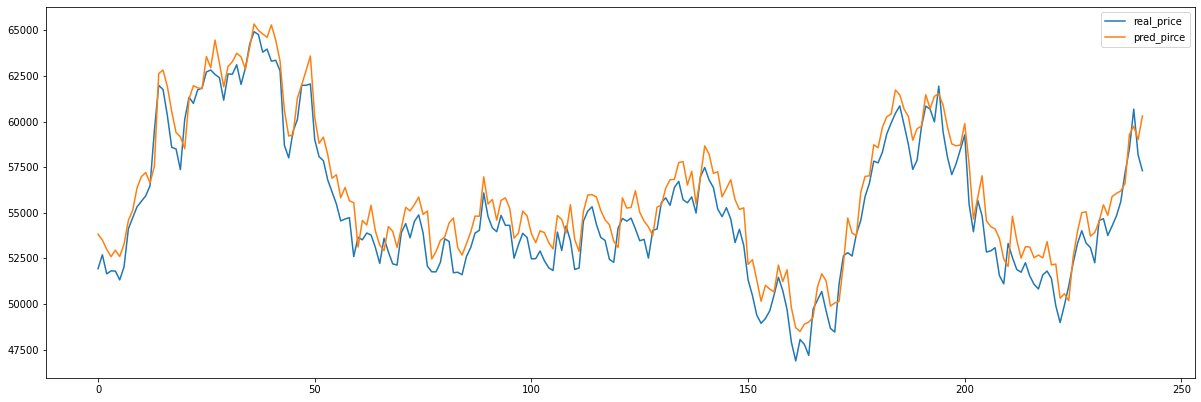

In [16]:
pred = model.predict(x_test)

pred_price = []

for i in pred:
  pred_price.append( (i+1)*window[0])
real_price = []
for i in y_test:
  real_price.append((i+1)*window[0])

fig = plt.figure(facecolor='white', figsize=(70,15))
ax = fig.add_subplot(234)
ax.plot(real_price, label="real_price")
ax.plot(pred_price, label="pred_pirce")
ax.legend()
plt.show()